Tugas : Muhammad Zulfan Hamka

Data : paru paru covid dan normal

# Importing Main Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# EDA

### Displaying Sample Images

In [ ]:
pth = '/content/drive/MyDrive/MSIB/DL/Tugas/assignments2/dataset'

image dimensions: (256, 256)


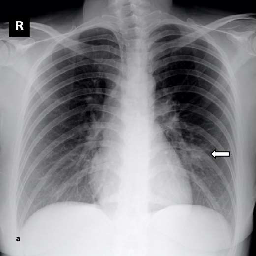

In [ ]:
# Pillow for image processing
from PIL import Image

# Getting sample apple image
covid_image_path = pth+'/train/COVID/COVID_2.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:",covid_image.size)
covid_image

image dimensions: (232, 232)


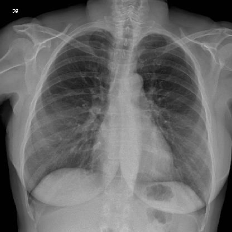

In [ ]:
# Getting sample tomatoes image
normal_image_path = pth+'/train/NORMAL/NORMAL_2.png'
normal_image = Image.open(normal_image_path)
print("image dimensions:", normal_image.size)
normal_image

### Getting dimensions of all images to check if there are any anomalies in the images data as well as to know the range of shapes and colors

In [ ]:
# Getting train and test directories
train_dir = pth+"/train"
test_dir = pth+"/test"

In [ ]:
from itertools import chain
from matplotlib import pyplot as plt
from PIL import Image
import os

# Creating set of dimensions
unique_dimensions = set()
unique_modes = set()

# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)
        # Adding shape and mode of give image to sets
        unique_dimensions.add(image.size[0])
        unique_dimensions.add(image.size[1])
        unique_modes.add(image.mode)

print("unique modes:", unique_modes)
print("unique dimensions:", unique_dimensions)

unique modes: {'RGB', 'RGBA'}
unique dimensions: {232, 256}


#### All images are at diffrent sizes they will have to be resized into same dimension later

In [ ]:
# Setting the dimensions for images to be resized to
DIMENSIONS = [100, 100]

### For curiosity displaying all images with modes == "P"

In [ ]:
# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)

        # Displaying images
        if image.mode == "P":
            plt.axis("off")
            plt.imshow(image)
            plt.show()

# Creating CNN model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras import backend
import tensorflow as tf
import keras

# Creating simple model
def simple_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', activation="relu", input_shape=(*DIMENSIONS, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

In [ ]:
# Creating advanced model
def advanced_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(*DIMENSIONS, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

### Creating Image Generator Pipeline

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Applying data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.25,
      height_shift_range=0.25,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=(0.8, 1.2),
      fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow from directory images using train_datagen and valid_datagen generators

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

valid_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary')

Found 3427 images belonging to 2 classes.
Found 3428 images belonging to 2 classes.


### Compiling And Training The Model

In [ ]:
# Creating new model
model = simple_model()
# model = advanced_model()

# Parameters
BATCH_SIZE = 64
EPOCHS = 10

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [ ]:
# Training the model
history = model.fit(
      train_generator,
      validation_data=valid_generator,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if epoch < 60 else lr * tf.math.exp(-0.05))],
      verbose=1)

Epoch 1/10
108/108 [==============================] - 1205s 11s/step - loss: 0.6158 - accuracy: 0.7628 - val_loss: 0.2008 - val_accuracy: 0.9481 - lr: 0.0010
Epoch 2/10
108/108 [==============================] - 139s 1s/step - loss: 0.3269 - accuracy: 0.8678 - val_loss: 0.1338 - val_accuracy: 0.9609 - lr: 0.0010
Epoch 3/10
108/108 [==============================] - 132s 1s/step - loss: 0.2534 - accuracy: 0.9052 - val_loss: 0.1978 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 4/10
108/108 [==============================] - 138s 1s/step - loss: 0.2189 - accuracy: 0.9262 - val_loss: 0.0977 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 5/10
108/108 [==============================] - 139s 1s/step - loss: 0.2048 - accuracy: 0.9247 - val_loss: 0.0971 - val_accuracy: 0.9697 - lr: 0.0010
Epoch 6/10
108/108 [==============================] - 137s 1s/step - loss: 0.1489 - accuracy: 0.9446 - val_loss: 0.2766 - val_accuracy: 0.8734 - lr: 0.0010
Epoch 7/10
108/108 [==============================] - 137s 1s/

# Testing CNN model

### Plotting Learning Curves

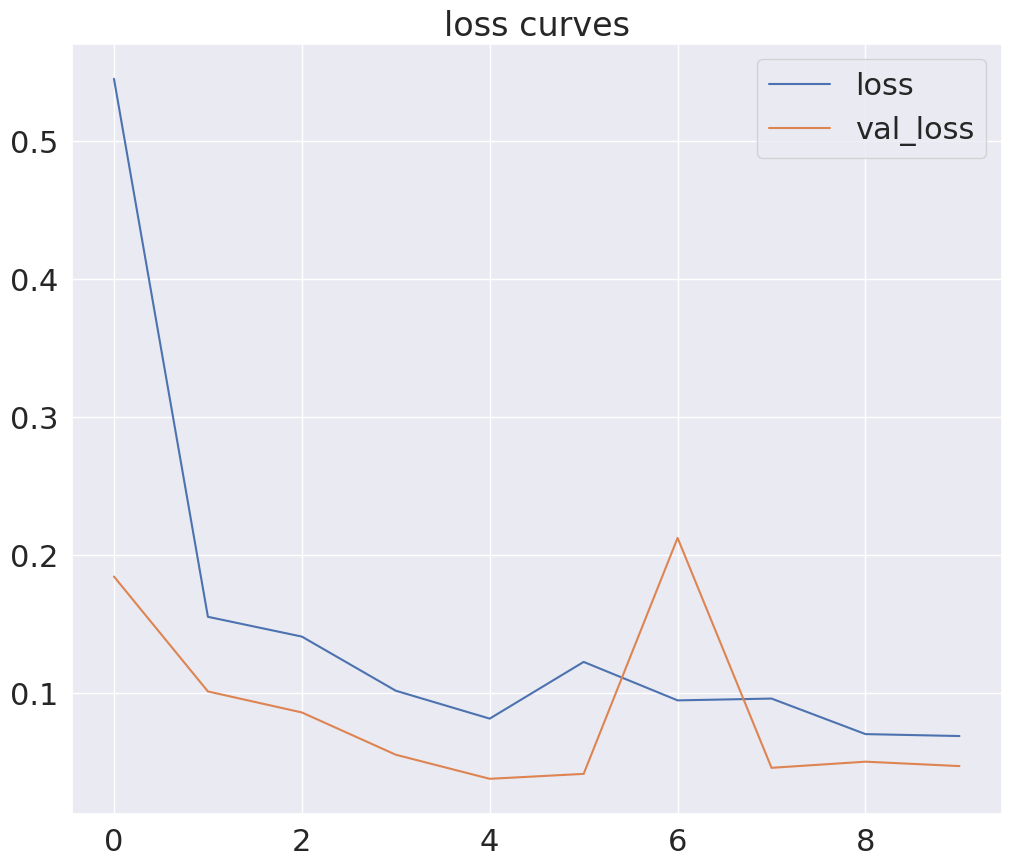

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss curves
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

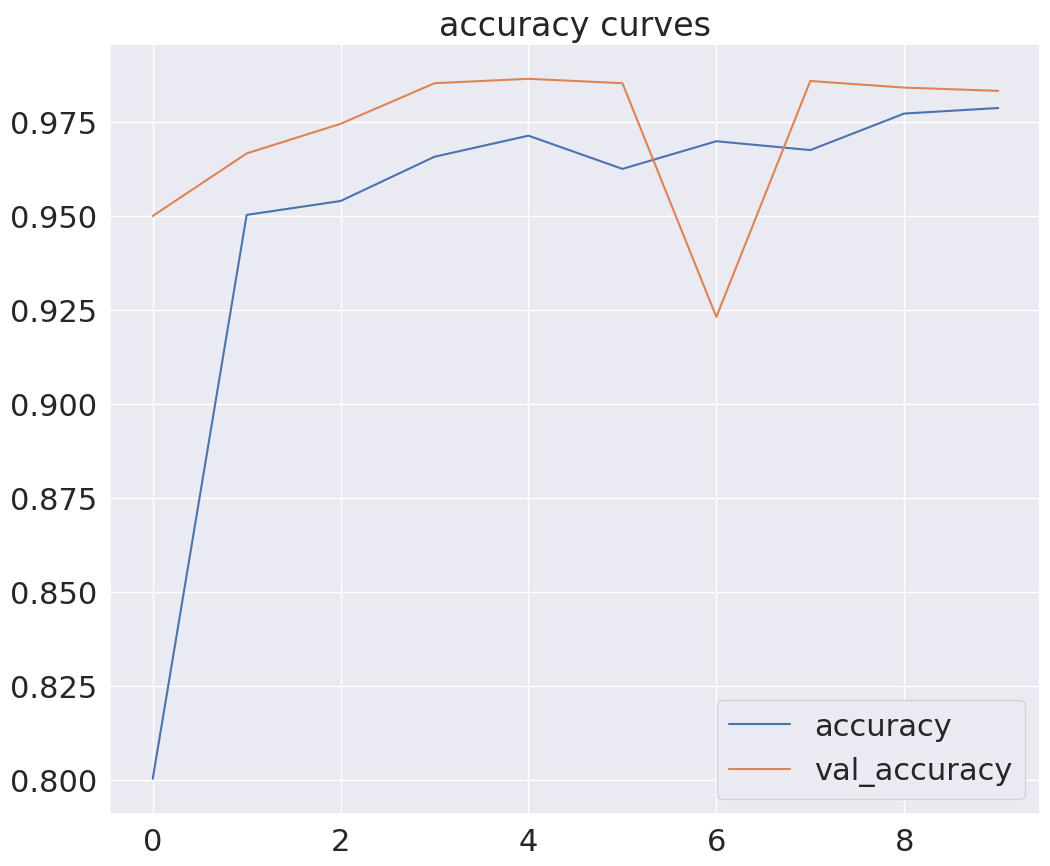

In [ ]:
# Plotting accuracy curves
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

### Displaying Confusion Matrix

In [ ]:
# Creating new generator for test data
test_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for test images
        target_size=(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)  # We don't want to shuffle the test data

# Predicting labels for all test images
y_pred = model.predict(test_generator)
y_pred[:10]

Found 3428 images belonging to 2 classes.
108/108 [==============================] - 35s 321ms/step


array([[0.00228818],
       [0.00098472],
       [0.00977708],
       [0.00250707],
       [0.02765732],
       [0.00876695],
       [0.0095494 ],
       [0.02617202],
       [0.00471735],
       [0.02248227]], dtype=float32)

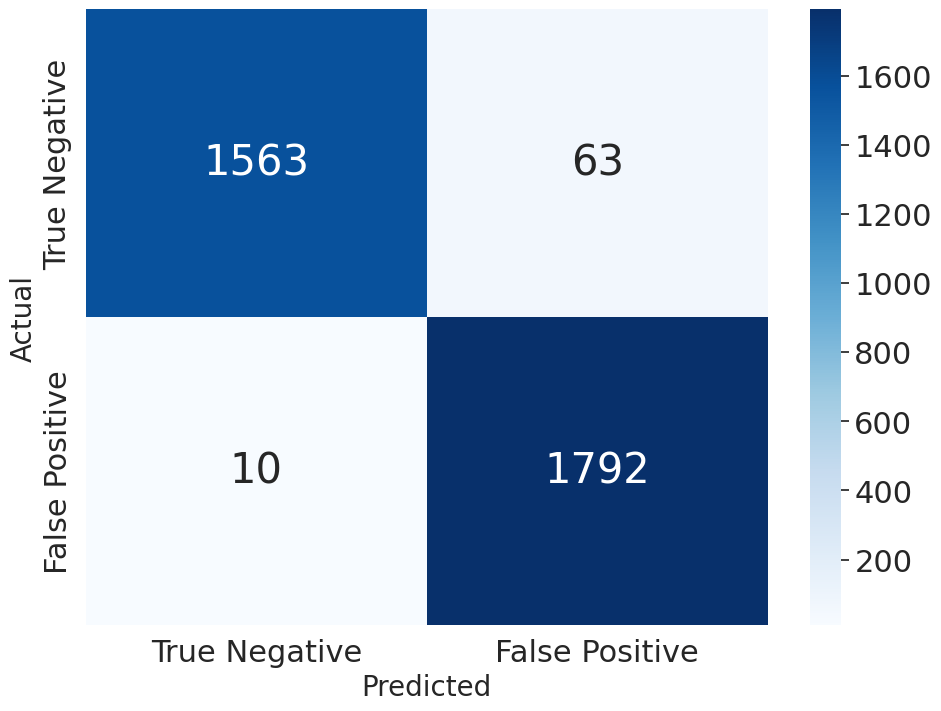

In [ ]:
from sklearn.metrics import confusion_matrix

# Getting the true labels for the test data
y_true = test_generator.labels

# Converting the predicted labels to binary labels
y_pred = np.round(y_pred)

# Calculating the confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

# Displaying the confusion matrix
import seaborn as sns
from seaborn import heatmap

plt.figure(figsize=(11,8))
sns.set(font_scale=2)

heatmap(confusion_matrix,
        annot=True,
        annot_kws={"size": 30},
        fmt='g',
        cmap='Blues',
        xticklabels=['True Negative', 'False Positive'],
        yticklabels=['True Negative', 'False Positive'])

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

### Displaying those images that were wrongly classified

In [ ]:
# Getting indecies of wrongly classified images
misclassified_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]

# Displaying all wrongly classified images
for i in misclassified_indices:
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

#Classification

In [ ]:
predictions = model.predict(valid_generator)
y_pred = np.round(predictions)
y_true = valid_generator.classes

108/108 [==============================] - 36s 334ms/step


In [ ]:
from sklearn.metrics import classification_report
# Classification report
class_names = list(valid_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

       COVID       0.47      0.46      0.46      1626
      NORMAL       0.52      0.54      0.53      1802

    accuracy                           0.50      3428
   macro avg       0.50      0.50      0.50      3428
weighted avg       0.50      0.50      0.50      3428



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

np.random.seed(42)
tf.random.set_seed(42)



In [ ]:
train_dir = '/content/drive/MyDrive/MSIB/DL/Tugas/assignments2/dataset/train'
test_dir = '/content/drive/MyDrive/MSIB/DL/Tugas/assignments2/dataset/test'

In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Set batch size and image dimensions
batch_size = 32
img_height = 224
img_width = 224

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 3427 images belonging to 2 classes.


In [ ]:
# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 3428 images belonging to 2 classes.


In [ ]:
# Define the AlexNet model
model = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
107/107 [==============================] - 806s 8s/step - loss: 0.5447 - accuracy: 0.8003 - val_loss: 0.1842 - val_accuracy: 0.9501
Epoch 2/10
107/107 [==============================] - 839s 8s/step - loss: 0.1550 - accuracy: 0.9504 - val_loss: 0.1009 - val_accuracy: 0.9667
Epoch 3/10
107/107 [==============================] - 835s 8s/step - loss: 0.1407 - accuracy: 0.9541 - val_loss: 0.0857 - val_accuracy: 0.9746
Epoch 4/10
107/107 [==============================] - 833s 8s/step - loss: 0.1014 - accuracy: 0.9658 - val_loss: 0.0551 - val_accuracy: 0.9854
Epoch 5/10
107/107 [==============================] - 818s 8s/step - loss: 0.0812 - accuracy: 0.9714 - val_loss: 0.0376 - val_accuracy: 0.9866
Epoch 6/10
107/107 [==============================] - 823s 8s/step - loss: 0.1223 - accuracy: 0.9626 - val_loss: 0.0412 - val_accuracy: 0.9854
Epoch 7/10
107/107 [==============================] - 815s 8s/step - loss: 0.0945 - accuracy: 0.9700 - val_loss: 0.2121 - val_accuracy: 0.9232

In [ ]:
predictions = model.predict(valid_generator)
y_pred = np.round(predictions)
y_true = valid_generator.classes

108/108 [==============================] - 36s 334ms/step


In [ ]:
from sklearn.metrics import classification_report
# Classification report
class_names = list(valid_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

       COVID       0.47      0.46      0.46      1626
      NORMAL       0.52      0.54      0.53      1802

    accuracy                           0.50      3428
   macro avg       0.50      0.50      0.50      3428
weighted avg       0.50      0.50      0.50      3428

